In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'E:\industrial training SVVV\datasets\houseprice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
df.shape

(21613, 21)

In [33]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
#here in prediction id and date has no use
#as zipcode is provided there is no need of latitude and longitude
df=df.drop(['id','date','lat','long'],axis=1)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [35]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [36]:
#difference between mean and std in sqft_living,sqft_above,sqft_lot15 is more so drop that column
df=df.drop(['sqft_living','sqft_above','sqft_lot15'],axis=1)
df.head()


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15
0,221900.0,3,1.00,5650,1.0,0,0,3,7,0,1955,0,98178,1340
1,538000.0,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,98125,1690
2,180000.0,2,1.00,10000,1.0,0,0,3,6,0,1933,0,98028,2720
3,604000.0,4,3.00,5000,1.0,0,0,5,7,910,1965,0,98136,1360
4,510000.0,3,2.00,8080,1.0,0,0,3,8,0,1987,0,98074,1800


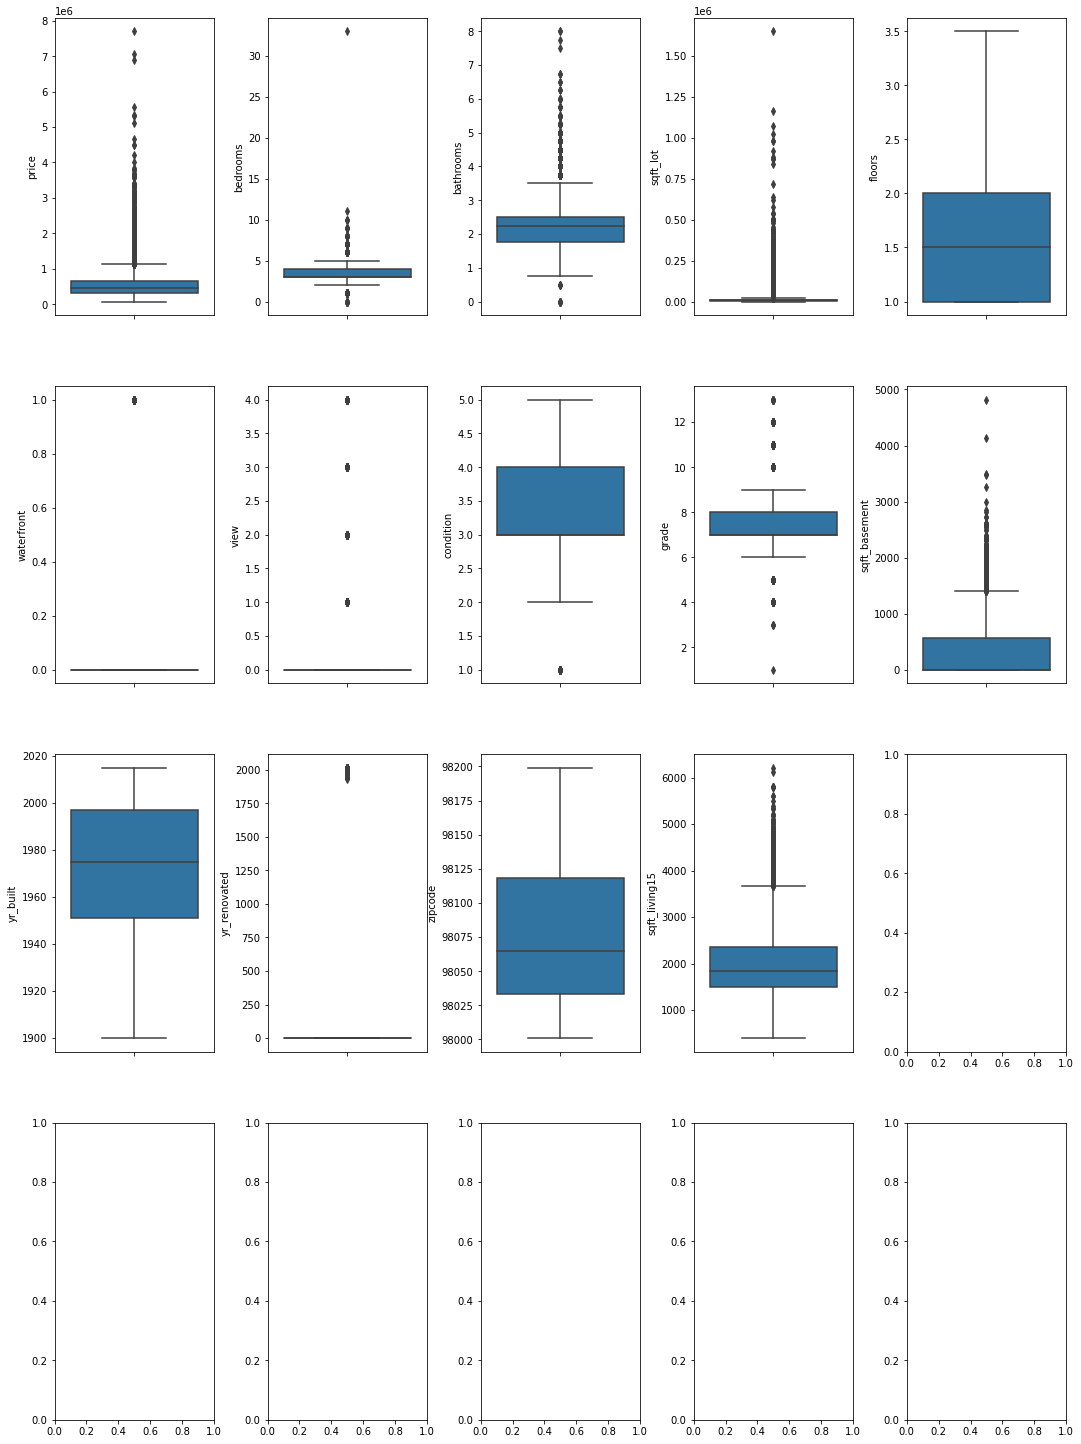

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 20))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in df.items():
    sns.boxplot(y=v, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.1, h_pad=5.0)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=df.iloc[:,1:].values
y1=df.iloc[:,0:1].values
x=sc.fit_transform(x1)
y=sc.fit_transform(y1)

In [39]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.398737,-1.447464,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.658681,-0.544898,-0.210128,1.870152,-0.943355
1,-0.398737,0.175607,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.245141,-0.681079,4.746678,0.879568,-0.432686
2,-1.473959,-1.447464,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-0.658681,-1.293892,-0.210128,-0.933388,1.070140
3,0.676485,1.149449,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,1.397515,-0.204446,-0.210128,1.085160,-0.914174
4,-0.398737,-0.149007,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,0.544548,-0.210128,-0.073636,-0.272190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,1.293542,-0.210128,0.468382,-0.666135
21609,0.676485,0.500221,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,1.463768,-0.210128,1.272063,-0.228419
21610,-1.473959,-1.772078,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.658681,1.293542,-0.210128,1.234683,-1.410253
21611,-0.398737,0.500221,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,1.123316,-0.210128,-0.952078,-0.841221


In [40]:
y=pd.DataFrame(y)
y

,0
0,-0.866717
1,-0.005688
2,-0.980849
3,0.174090
4,-0.081958
...,...
21608,-0.490545
21609,-0.381588
21610,-0.375865
21611,-0.381588


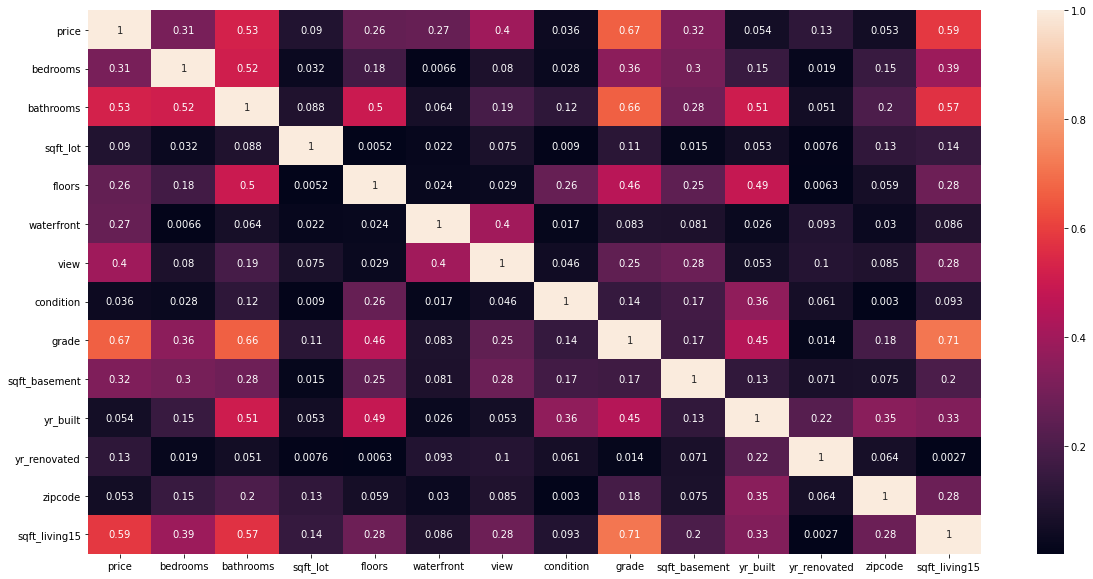

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)

In [43]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [44]:
y_pred=lr.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)

0.6146478959067627

In [46]:
lr.score(x,y)

0.6261896874099881

In [47]:
mean_squared_error(y_test,y_pred)

0.3327523751025383

In [48]:
#polynomial regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly_reg=PolynomialFeatures(degree=3)
x_poly_train=poly_reg.fit_transform(X_train)

In [51]:
poly_reg=PolynomialFeatures(degree=3)
x_poly_test=poly_reg.fit_transform(X_test)

In [52]:
ro_2=LinearRegression()
ro_2.fit(x_poly_train,y_train)

LinearRegression()

In [53]:
y_pred_poly=ro_2.predict(x_poly_test)

In [54]:
r2_score(y_pred_poly,y_test)

0.6131695526604062

In [55]:
ro_2.score(x_poly_train,y_train)

0.7897478602614773